In [57]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
plt.style.use('plotting')
from rotate_coords import *

In [58]:
com = np.array([7.498002343750000000e+04, 6.033340332031250000e+03, 3.284355859375000000e+04])
comv = np.array([2.965035676956176758e+00, 4.560226135253906250e+02, 1.409910202026367188e+01])
print(com)

[74980.0234375   6033.34033203 32843.55859375]


In [59]:
id = 474127
gas = np.loadtxt('/Users/ektapatel/Desktop/raw_particle_data/%s_gas_properties_TNGv2.txt'%id)
x = np.array(gas[:,0])
y = gas[:,1]
z = gas[:,2]
vx = gas[:,3]
vy = gas[:,4]
vz = gas[:,5]
m = gas[:,6]
nh = gas[:,7]
sfr = gas[:,8]
gz = gas[:,9]

stars = np.loadtxt('/Users/ektapatel/Desktop/raw_particle_data/%s_star_properties_TNGv2.txt'%id)
m2 = stars[:,6]
tform2 = stars[:,7]    
gz2 = stars[:,8]
x2 = np.array(stars[:,0])
y2 = stars[:,1]
z2 = stars[:,2]
vx2 = stars[:,3]
vy2 = stars[:,4]
vz2 = stars[:,5]

In [70]:
newx = []
for i in x:
    if i > 60000:
        newx.append(75000-i)
    else:
        newx.append(i)
        
newx2 = []
for j in x2:
    if j > 60000:
        newx2.append(75000-j)
    else:
        newx2.append(j)

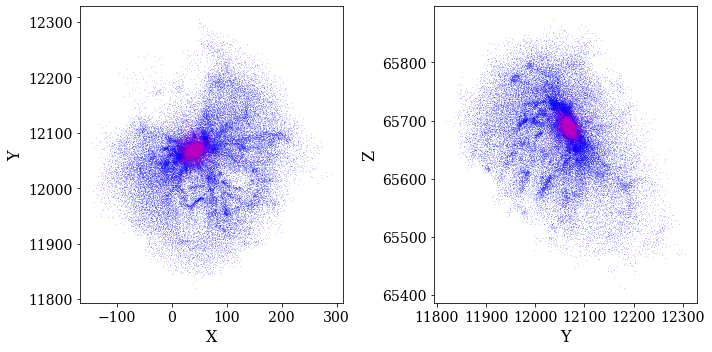

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(newx, y,',',color='b',alpha=0.2)
plt.plot(newx2,y2,',',color='m',alpha=0.2)
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.plot(y, z,',',color='b',alpha=0.2)
plt.plot(y2,z2,',',color='m',alpha=0.2)
plt.xlabel('Y')
plt.ylabel('Z')
plt.tight_layout()

In [72]:
#print(len(y+com[1]))
np.savetxt('/Users/ektapatel/Desktop/raw_particle_data/%s_gas_properties_TNGv2.txt'%id, np.column_stack((newx, y, z, vx, vy, vz,m, nh, sfr, gz)), delimiter="  ")
np.savetxt('/Users/ektapatel/Desktop/raw_particle_data/%s_star_properties_TNGv2.txt'%id, np.column_stack((newx2, y2, z2, vx2, vy2, vz2, m2, tform2, gz2)), delimiter="  ")
#np.savetxt('/Users/ektapatel/Desktop/raw_particle_data/%s_gas_properties_TNGv2.txt'%id, np.column_stack((newx+com[0], y+com[1], z+com[2], vx+comv[0], vy+comv[1], vz+comv[2],m, nh, sfr, gz)), delimiter="  ")
#np.savetxt('/Users/ektapatel/Desktop/raw_particle_data/%s_star_properties_TNGv2.txt'%id, np.column_stack((newx2+com[0], y2+com[1], z2+com[2], vx2+comv[0], vy2+comv[1], vz2+comv[2], m2, tform2, gz2)), delimiter="  ")

In [73]:
rotate_original_all(474127)

0

65840 66733
65840 66733


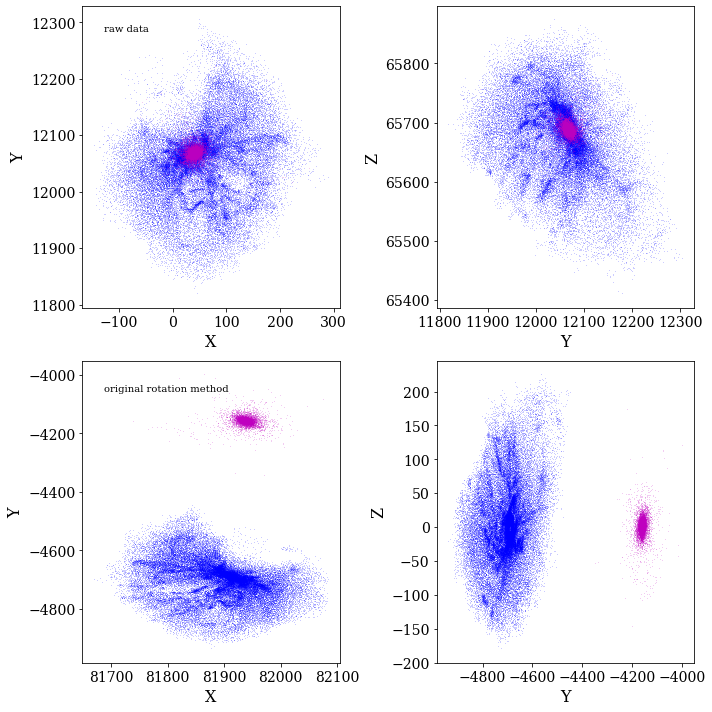

In [74]:

gas = np.loadtxt('/Users/ektapatel/Desktop/raw_particle_data/%s_gas_properties_TNGv2.txt'%id)
stars = np.loadtxt('/Users/ektapatel/Desktop/raw_particle_data/%s_star_properties_TNGv2.txt'%id)
print(len(gas), len(stars))
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(gas[:,0],gas[:,1],',',color='b',alpha=0.2)
plt.plot(stars[:,0],stars[:,1],',',color='m',alpha=0.2)
plt.xlabel('X')
plt.ylabel('Y')
plt.figtext(0.15, 0.95,'raw data')

plt.subplot(222)
plt.plot(gas[:,1],gas[:,2],',',color='b',alpha=0.2)
plt.plot(stars[:,1],stars[:,2],',',color='m',alpha=0.2)
plt.xlabel('Y')
plt.ylabel('Z')

gas = np.loadtxt('/Users/ektapatel/Desktop/rotated_data/%s_gas_properties_TNGv2_rotated.txt'%id)
stars = np.loadtxt('/Users/ektapatel/Desktop/rotated_data/%s_star_properties_TNGv2_rotated.txt'%id)
print(len(gas), len(stars))
plt.subplot(223)
plt.plot(gas[:,0],gas[:,1],',',color='b',alpha=0.2)
plt.plot(stars[:,0],stars[:,1],',',color='m',alpha=0.2)
plt.xlabel('X')
plt.ylabel('Y')
#plt.xlim(-250,250)
#plt.ylim(-250,250)
plt.figtext(0.15, 0.45,'original rotation method')

plt.subplot(224)
plt.plot(gas[:,1],gas[:,2],',',color='b',alpha=0.2)
plt.plot(stars[:,1],stars[:,2],',',color='m',alpha=0.2)
#plt.xlim(-250,250)
#plt.ylim(-250,250)
plt.xlabel('Y')
plt.ylabel('Z')

plt.tight_layout()
plt.savefig('particle_plots/%s_particles_raw_rotated.png'%id)